In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
def churnToNumeric(x): 
    if x == 'No': 
        return 0
    if x == 'Yes':
        return 1

In [4]:
df['Churn_Num'] = df['Churn'].apply(churnToNumeric)
df.drop(['Churn'], axis=1, inplace=True)

In [ ]:
df.head()

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn_Num           0
dtype: int64

In [6]:
corr = df.corr()

In [7]:
corr.style.background_gradient().set_precision(2)

,SeniorCitizen,tenure,MonthlyCharges,Churn_Num
SeniorCitizen,1,0.017,0.22,0.15
tenure,0.017,1,0.25,-0.35
MonthlyCharges,0.22,0.25,1,0.19
Churn_Num,0.15,-0.35,0.19,1


## Analyse by describing data

##### Which features are available in dataset?

In [8]:
print(df.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn_Num']


#### Which features are categorical?
#### Which features are numerical?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn_Num           7043 non-null int64
dtypes: float64(1), int64(3), obje

#### What is the distribution of numerical feature values across the samples?

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Num
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


#### What is the distribution of categorical features?

In [11]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,5696-QURRL,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


## Analyze by pivoting features

In [12]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn_Num'], dtype=object)

In [13]:
df[['gender', 'Churn_Num']].groupby(['gender'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,gender,Churn_Num
0,Female,939
1,Male,930


In [14]:
df[['SeniorCitizen', 'Churn_Num']].groupby(['SeniorCitizen'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,SeniorCitizen,Churn_Num
0,0,1393
1,1,476


In [15]:
df[['Partner', 'Churn_Num']].groupby(['Partner'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,Partner,Churn_Num
0,No,1200
1,Yes,669


In [16]:
df[['Dependents', 'Churn_Num']].groupby(['Dependents'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,Dependents,Churn_Num
0,No,1543
1,Yes,326


In [17]:
df[['PhoneService', 'Churn_Num']].groupby(['PhoneService'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,PhoneService,Churn_Num
1,Yes,1699
0,No,170


In [18]:
df[['MultipleLines', 'Churn_Num']].groupby(['MultipleLines'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,MultipleLines,Churn_Num
2,Yes,850
0,No,849
1,No phone service,170


In [19]:
df[['InternetService', 'Churn_Num']].groupby(['InternetService'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,InternetService,Churn_Num
1,Fiber optic,1297
0,DSL,459
2,No,113


In [20]:
df[['OnlineSecurity', 'Churn_Num']].groupby(['OnlineSecurity'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,OnlineSecurity,Churn_Num
0,No,1461
2,Yes,295
1,No internet service,113


In [21]:
df[['OnlineBackup', 'Churn_Num']].groupby(['OnlineBackup'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,OnlineBackup,Churn_Num
0,No,1233
2,Yes,523
1,No internet service,113


In [22]:
df[['DeviceProtection', 'Churn_Num']].groupby(['DeviceProtection'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,DeviceProtection,Churn_Num
0,No,1211
2,Yes,545
1,No internet service,113


In [23]:
df[['TechSupport', 'Churn_Num']].groupby(['TechSupport'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,TechSupport,Churn_Num
0,No,1446
2,Yes,310
1,No internet service,113


In [24]:
df[['StreamingTV', 'Churn_Num']].groupby(['StreamingTV'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,StreamingTV,Churn_Num
0,No,942
2,Yes,814
1,No internet service,113


In [25]:
df[['StreamingMovies', 'Churn_Num']].groupby(['StreamingMovies'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,StreamingMovies,Churn_Num
0,No,938
2,Yes,818
1,No internet service,113


In [26]:
df[['Contract', 'Churn_Num']].groupby(['Contract'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,Contract,Churn_Num
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [27]:
df[['PaperlessBilling', 'Churn_Num']].groupby(['PaperlessBilling'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,PaperlessBilling,Churn_Num
1,Yes,1400
0,No,469


In [28]:
df[['PaymentMethod', 'Churn_Num']].groupby(['PaymentMethod'], as_index=False).sum().sort_values(by='Churn_Num', ascending=False)

,PaymentMethod,Churn_Num
2,Electronic check,1071
3,Mailed check,308
0,Bank transfer (automatic),258
1,Credit card (automatic),232


In [30]:
pd.pivot_table(df, index=["PaymentMethod"]).sum()

Churn_Num           0.963451
MonthlyCharges    253.877907
SeniorCitizen       0.605586
tenure            133.930773
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


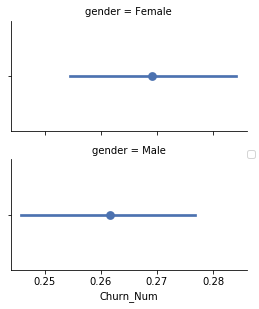

In [32]:
grid = sns.FacetGrid(df, row='gender', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Churn_Num', palette='deep')
grid.add_legend()